# Simple Linear Regression  Q2
Problem statment: Salary - Experience features 
Created By: Razia Patel
Date:27 feb 2023

In [1]:
#EDA cleaning data,Imputation -data types,missing values,duplicate rows
import pandas as pd
df_salaries = pd.read_csv('Salary_data.csv')
df_salaries.shape
df_salaries.info()
#df_salaries.drop_duplicates() # dropping duplicate rows if exists
#df_salaries.isnull() # check null values
#df_salaries.value_counts() # check if unwanted data exists
#df_salaries.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


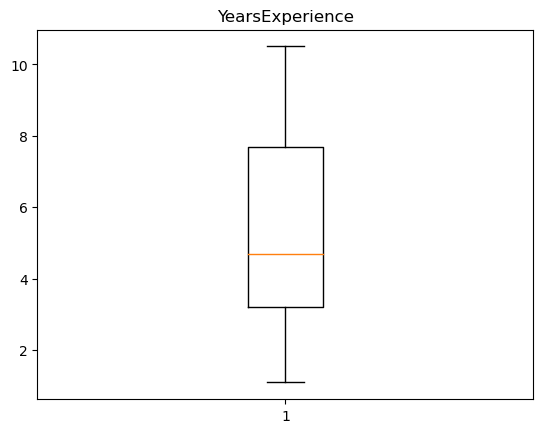

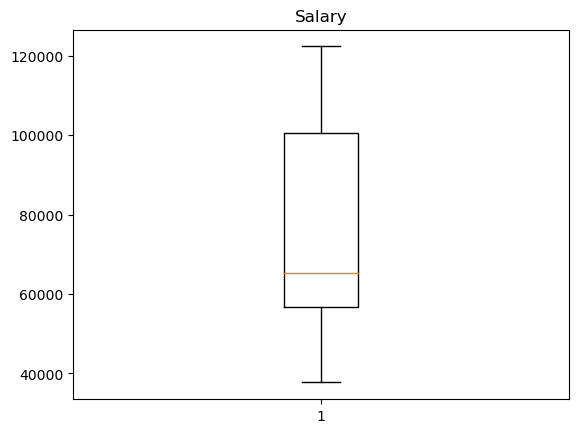

In [2]:
# descriptive statistics ,check for outliers 
import matplotlib.pyplot as plt
print(df_salaries.describe())
plt.title('YearsExperience')
box= plt.boxplot(df_salaries['YearsExperience'])
plt.show(box)
plt.title('Salary')
box1= plt.boxplot(df_salaries['Salary'])
plt.show(box1)
# no presence of outliers detected

In [3]:
#checking for correlaion
df_salaries.corr() # very strong positive correlation

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


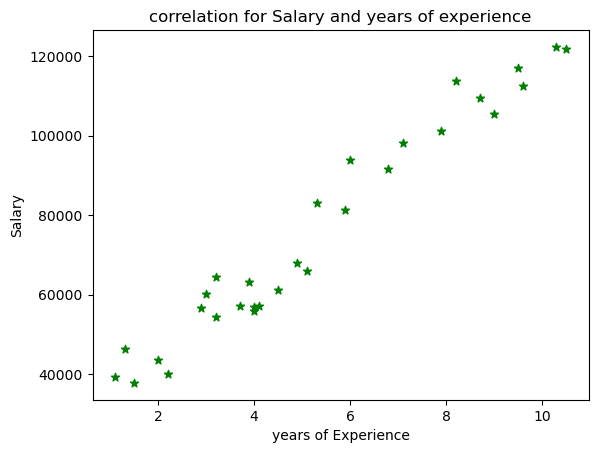

In [4]:
#representing correlaion through scatter plt

plt.scatter(x=df_salaries["YearsExperience"],y=df_salaries['Salary'], marker='*',color='green')
plt.title('correlation for Salary and years of experience')
plt.xlabel('years of Experience')
plt.ylabel('Salary')
plt.show()

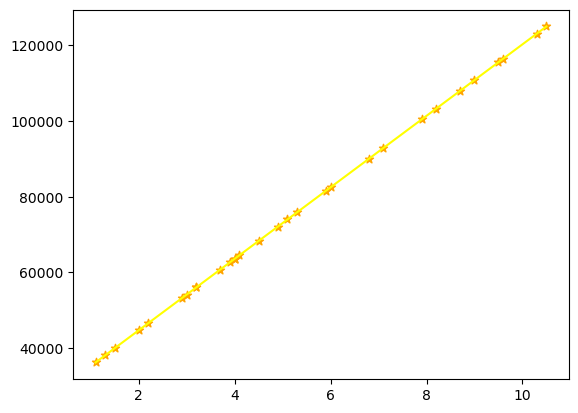

prediction from custom made model from scipy package for years of experience 4years = 63592.049484489


In [5]:
#Designing model for linear regression - (y=mx+c ) using scipy.stats
import scipy.stats as stats
x=df_salaries["YearsExperience"].values 
y=df_salaries['Salary'].values
slope,c,rvalue,p,std_err =stats.linregress(x,y)

def mycustopredictmodel(val):
    return(slope * val + c) # intercept is c

reg_predict=list(map(mycustopredictmodel,x))
plt.scatter(x=df_salaries["YearsExperience"],y=reg_predict,marker='*', color='orange')
plt.plot(x,reg_predict,color='yellow')
plt.show()


print('prediction from custom made model from scipy package for years of experience 4years =',mycustopredictmodel(4))
#rvalue
#slope
#c

In [6]:
# simple regression model using sklearn.
from sklearn import linear_model
reg= linear_model.LinearRegression()
reg.fit(df_salaries[["YearsExperience"]],df_salaries['Salary'])


LinearRegression()

intercept= 25792.20019866871
value of slope m= [9449.96232146]
prediction from custom made model from scipy package for years of experience 4years=  [63592.04948449]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


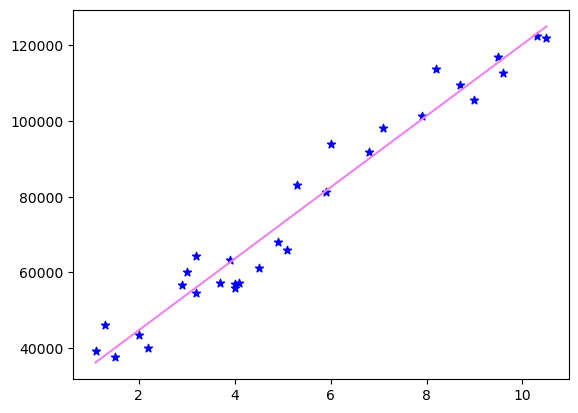

In [7]:
# checking reg intercept,slope ,r and p values both by pandas and skylearn models in y=mx+c where m is slope and c is intercept and r is correlation
print('intercept=',reg.intercept_)
print('value of slope m=',reg.coef_)

# predicting values currently for hardcoded data
print("prediction from custom made model from scipy package for years of experience 4years= ",reg.predict([[4]]))
#plotting the regression using sklearn reg predict
plt.scatter(x=df_salaries["YearsExperience"], y=df_salaries['Salary'],color='blue',marker='*')
plt.plot(df_salaries["YearsExperience"],reg.predict(df_salaries[["YearsExperience"]]),color='violet')
plt.show() 